In [3]:
import numpy as np
import matplotlib.pyplot as plt

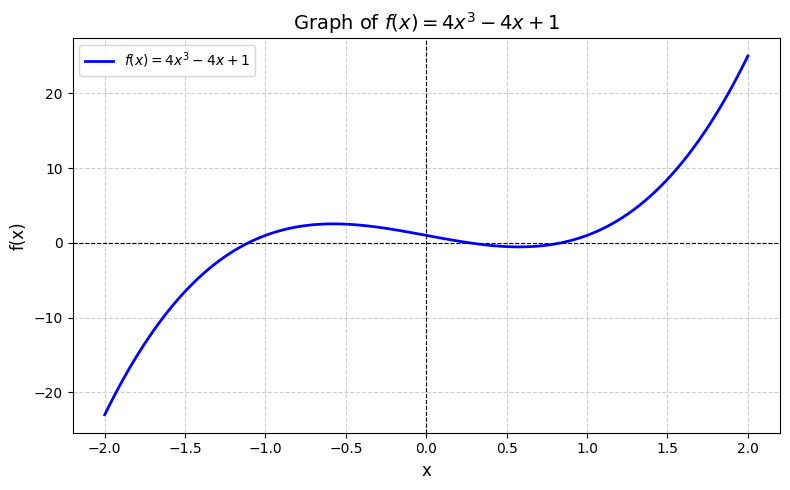

In [16]:
# Define the function
def f1(x):
    return 4*x**3 - 4*x + 1

# Generate x and corresponding y values
x_vals = np.linspace(-2, 2, 120)
y_vals = f1(x_vals)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=r'$f(x) = 4x^3 - 4x + 1$', color='blue', linewidth=2)

# Label axes and title
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.title("Graph of $f(x) = 4x^3 - 4x + 1$", fontsize=14)

# Draw horizontal and vertical axes
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

# Show legend and grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

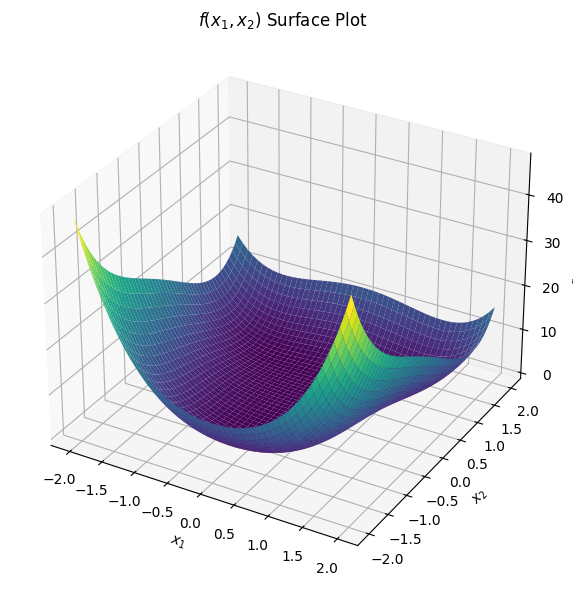

In [17]:
# Define the function of two variables
def f2(x1, x2):
    return x1**4 - 2*x1**2*x2 + x1**2 + x2**4 - x2**2

# Generate values over the domain
x1 = np.linspace(-2, 2, 500)
x2 = np.linspace(-2, 2, 500)
X1, X2 = np.meshgrid(x1, x2)
Z = f2(X1, X2)  # Evaluate the function on the grid

# Create 3D surface plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')

# Label axes and title
ax.set_title(r'$f(x_1, x_2)$ Surface Plot')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$f(x_1, x_2)$')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

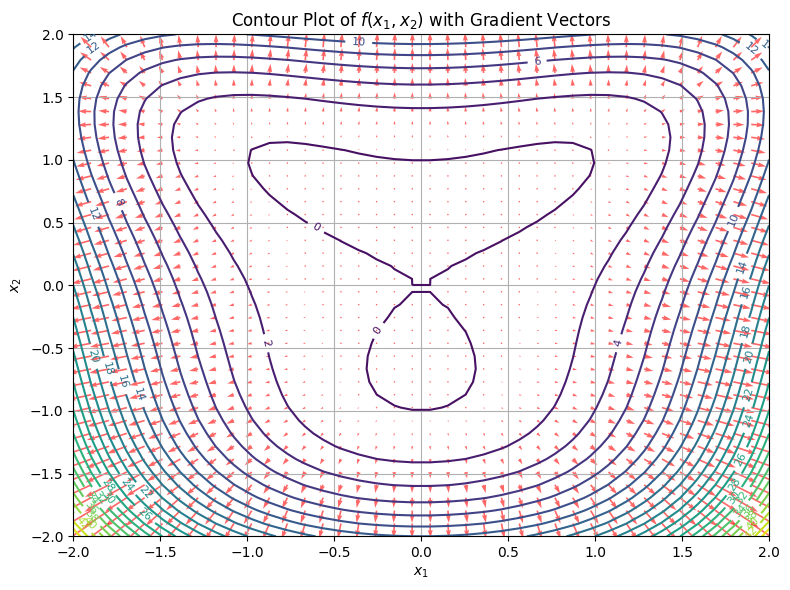

In [18]:
# Define the gradient of the function
def grad_f(x1, x2):
    df_dx1 = 4*x1**3 - 4*x1*x2 + 2*x1
    df_dx2 = -2*x1**2 + 4*x2**3 - 2*x2
    return df_dx1, df_dx2

# Create a grid for plotting
x1 = np.linspace(-2, 2, 40)
x2 = np.linspace(-2, 2, 40)
X1, X2 = np.meshgrid(x1, x2)
Z = f2(X1, X2)  # Evaluate function on the grid

# Compute gradient vectors on the grid
U, V = grad_f(X1, X2)

# Plot contour lines and gradient vectors
plt.figure(figsize=(8,6))
contours = plt.contour(X1, X2, Z, levels=30, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.quiver(X1, X2, U, V, color='red', alpha=0.6)  # Gradient vectors

# Labeling
plt.title(r'Contour Plot of $f(x_1, x_2)$ with Gradient Vectors')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.grid(True)
plt.tight_layout()
plt.show()

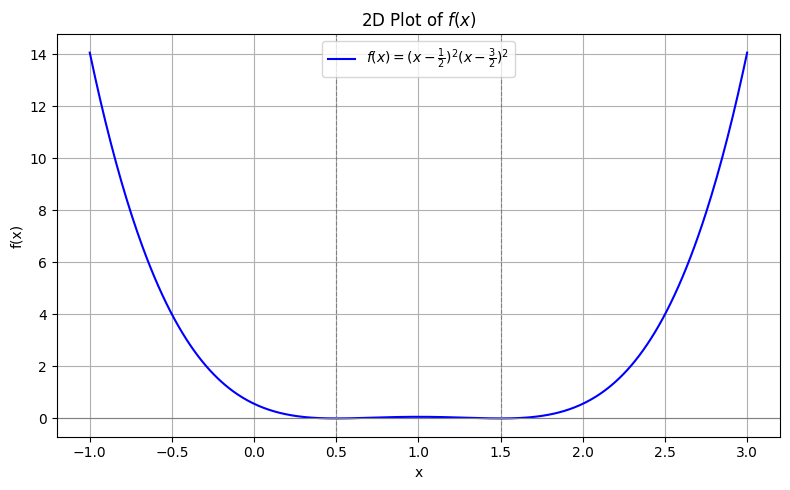

In [19]:
# Define the function
def f3(x):
    return (x - 1/2)**2 * (x - 3/2)**2

# Generate x values and compute corresponding y values
x_vals = np.linspace(-1, 3, 500)
y_vals = f3(x_vals)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=r'$f(x) = (x - \frac{1}{2})^2 (x - \frac{3}{2})^2$', color='blue')

# Add reference lines for x-axis and roots
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(x=0.5, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(x=1.5, color='gray', linestyle='--', linewidth=0.8)

# Label axes and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('2D Plot of $f(x)$')

# Add legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and show the plot
plt.savefig("graph4.png", dpi=300)
plt.show()

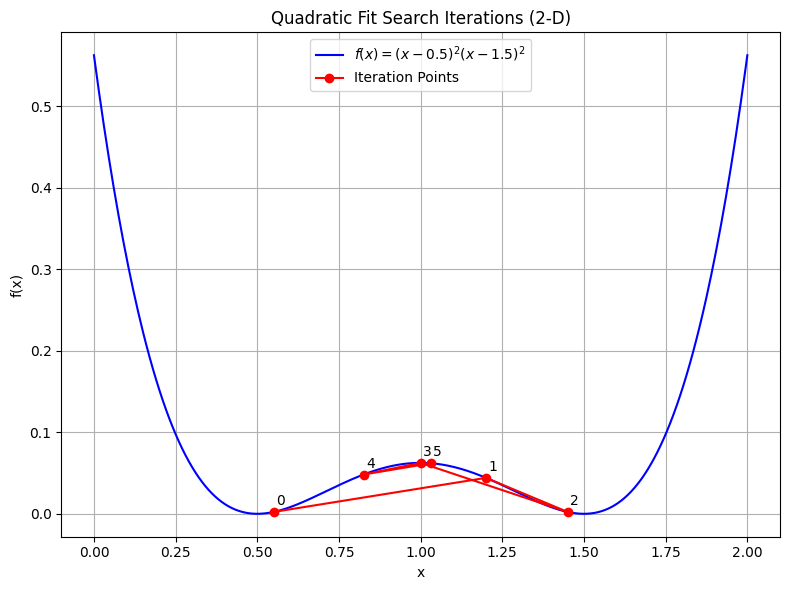

In [20]:
# Quadratic fit helper function: fits a parabola and returns its minimum point
def quadratic_fit_iteration(x_vals, f_vals):
    # Fit a quadratic: f(x) = ax^2 + bx + c
    coeffs = np.polyfit(x_vals, f_vals, 2)
    a, b, c = coeffs
    # Compute the vertex (minimum): -b / (2a)
    x_new = -b / (2 * a)
    return x_new

# Initial 3 points in the interval [0.5, 1.5]
x0, x1, x2 = 0.55, 1.2, 1.45
iteration_points = [(x0, f3(x0)), (x1, f3(x1)), (x2, f3(x2))]

# Perform 3 iterations of quadratic fitting
for _ in range(3):
    xs = [p[0] for p in iteration_points[-3:]]
    ys = [p[1] for p in iteration_points[-3:]]
    x_new = quadratic_fit_iteration(xs, ys)
    iteration_points.append((x_new, f3(x_new)))

# Plot the function and iteration points
x = np.linspace(0, 2, 400)
y = f3(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$f(x) = (x - 0.5)^2 (x - 1.5)^2$', color='blue')

# Plot the iteration points
px = [p[0] for p in iteration_points]
py = [p[1] for p in iteration_points]
plt.plot(px, py, 'ro-', label='Iteration Points')

# Annotate each point with its iteration number
for i, (x_i, y_i) in enumerate(iteration_points):
    plt.annotate(f'{i}', (x_i, y_i), textcoords="offset points", xytext=(5,5), ha='center')

# Labeling and save
plt.title('Quadratic Fit Search Iterations (2-D)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("graph5.png", dpi=300)
plt.show()

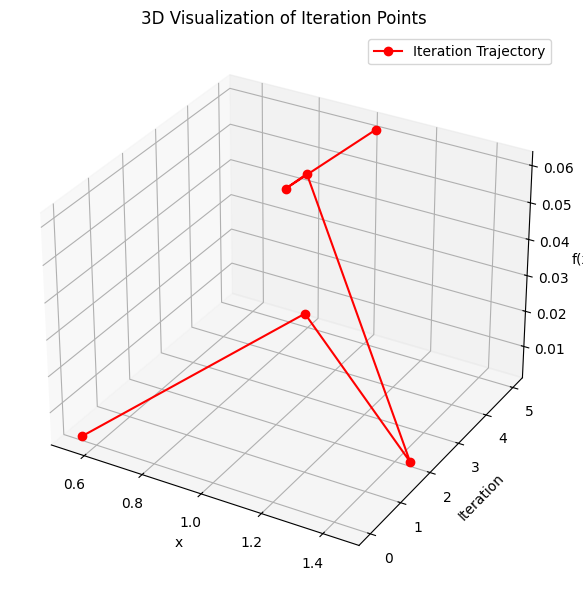

In [21]:
# 3D plot to visualize the iteration trajectory over steps
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Extract x values, f(x) values, and assign iteration indices as z-axis
xs = [p[0] for p in iteration_points]
ys = [p[1] for p in iteration_points]
zs = list(range(len(iteration_points)))  # Iteration numbers: 0, 1, 2, ...

# Plot the trajectory of iterations in 3D
ax.plot(xs, zs, ys, 'ro-', label='Iteration Trajectory')

# Axis labels and title
ax.set_xlabel('x')
ax.set_ylabel('Iteration')
ax.set_zlabel('f(x)')
ax.set_title('3D Visualization of Iteration Points')

# Show legend and adjust layout
plt.legend()
plt.tight_layout()
plt.savefig("graph6.png", dpi=300)
plt.show()

In [22]:
# Rosenbrock function definition
def rosenbrock(x):
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

# Gradient of the Rosenbrock function
def rosenbrock_grad(x):
    x1, x2 = x
    dfdx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    dfdx2 = 200 * (x2 - x1**2)
    return np.array([dfdx1, dfdx2])

# Backtracking line search using sufficient decrease condition
def backtracking_line_search(f, grad_f, x, direction, alpha=1.0, rho=0.5, c=1e-4):
    # Reduce alpha until the sufficient decrease condition is satisfied
    while f(x + alpha * direction) > f(x) + c * alpha * np.dot(grad_f(x), direction):
        alpha *= rho
    return alpha

# Steepest descent method using backtracking line search
def steepest_descent_rosenbrock(x0, tol=1e-6, max_iter=1000):
    x = x0
    history = [x.copy()]  # Store the path of iterations
    
    for _ in range(max_iter):
        grad = rosenbrock_grad(x)
        norm_grad = np.linalg.norm(grad)
        if norm_grad < tol:  # Stop if gradient is small enough
            break
        direction = -grad  # Steepest descent direction
        alpha = backtracking_line_search(rosenbrock, rosenbrock_grad, x, direction)
        x = x + alpha * direction  # Update x
        history.append(x.copy())
        
    return np.array(history)  # Return path of iterates

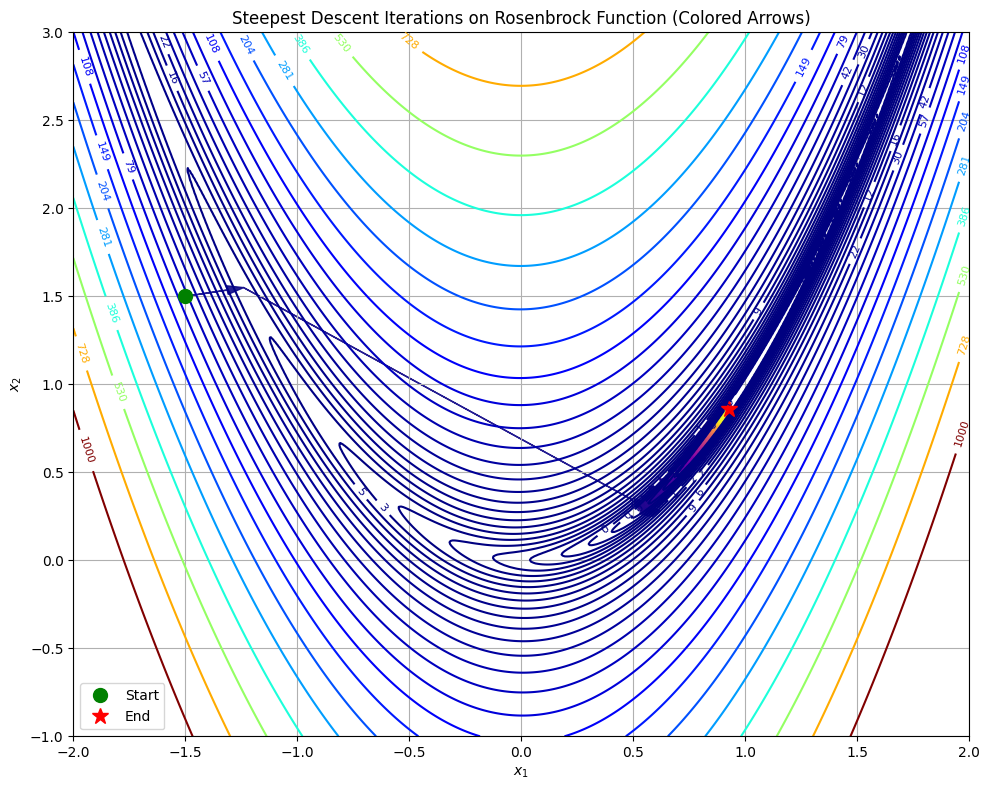

In [23]:
# Run the steepest descent algorithm from initial point
x0 = np.array([-1.5, 1.5])
trajectory = steepest_descent_rosenbrock(x0)

# Create a meshgrid for contour plotting
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])  # Evaluate Rosenbrock function on grid

# Contour plot with logarithmic level spacing
plt.figure(figsize=(10, 8))
contours = plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 30), cmap='jet')
plt.clabel(contours, inline=True, fontsize=8, fmt='%1.0f')

# Plot colored arrows showing trajectory (every 5 steps)
sampled = trajectory[::5]  # Reduce number of arrows for clarity
for i in range(len(sampled) - 1):
    pt, nxt = sampled[i], sampled[i + 1]
    plt.arrow(pt[0], pt[1], nxt[0] - pt[0], nxt[1] - pt[1],
              head_width=0.05, length_includes_head=True,
              color=plt.cm.plasma(i / len(sampled)), alpha=0.9)

# Mark start and end points
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=10, label='Start')
plt.plot(trajectory[-1, 0], trajectory[-1, 1], 'r*', markersize=12, label='End')

# Axis labels and title
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Steepest Descent Iterations on Rosenbrock Function (Colored Arrows)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("graph7.png", dpi=300)
plt.show()

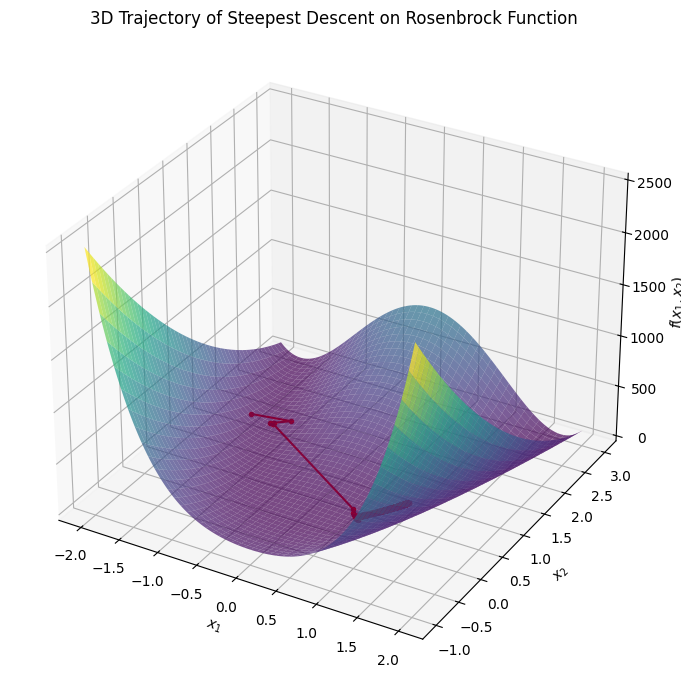

In [24]:
# 3D surface plot of Rosenbrock function with descent trajectory
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Plot the descent path over the surface
ax.plot(trajectory[:, 0], trajectory[:, 1], [rosenbrock(p) for p in trajectory],
        'r.-', label='Descent Path')

# Label axes and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.set_title('3D Trajectory of Steepest Descent on Rosenbrock Function')

# Final layout adjustments and save
plt.tight_layout()
plt.savefig("graph8.png", dpi=300)
plt.show()

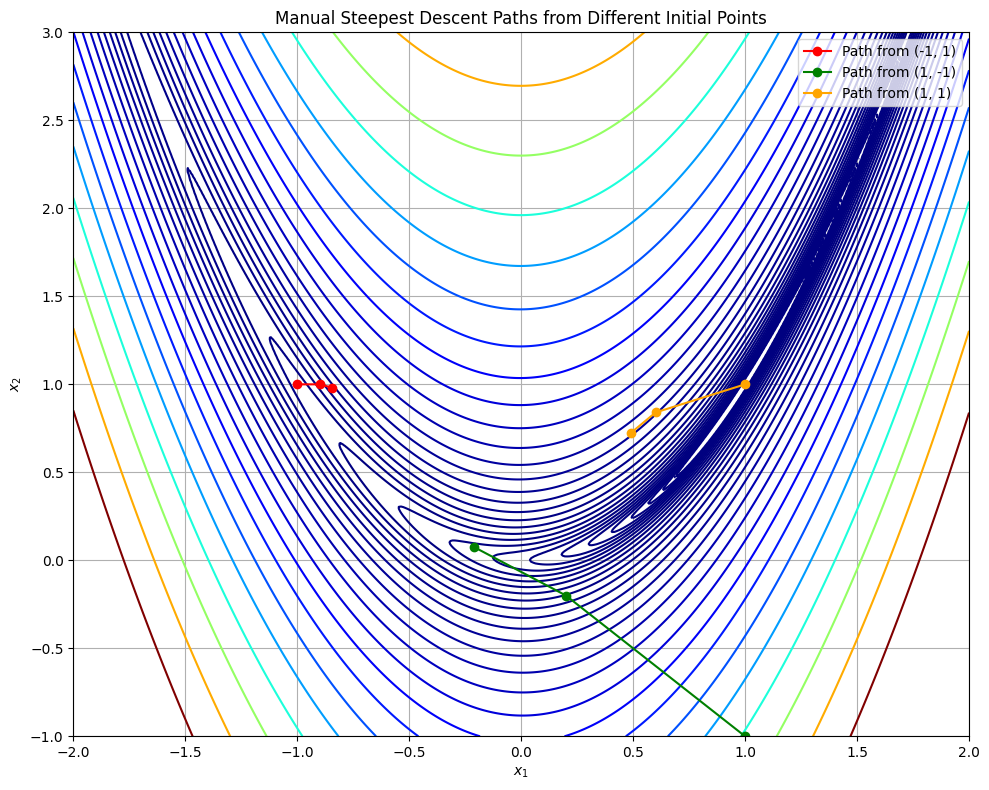

In [25]:
# Manually calculated trajectories for 2 iterations from 3 different starting points
manual_trajectories = {
    "(-1, 1)": np.array([
        [-1.0, 1.0],
        [-0.9, 1.0],
        [-0.8442, 0.9810]
    ]),
    "(1, -1)": np.array([
        [1.0, -1.0],
        [0.2, -0.2],
        [-0.2112, 0.0758]
    ]),
    "(1, 1)": np.array([
        [1.0, 1.0],
        [0.6, 0.84],
        [0.4896, 0.7235]
    ])
}

# Assign colors to each trajectory for clarity
colors = {
    "(-1, 1)": 'red',
    "(1, -1)": 'green',
    "(1, 1)": 'orange'
}

# Generate a meshgrid for contour plot
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = 100 * (Y - X**2)**2 + (1 - X)**2  # Rosenbrock function evaluated on grid

# 2D contour plot of the function
plt.figure(figsize=(10, 8))
cp = plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 30), cmap='jet')

# Plot each manual trajectory
for label, traj in manual_trajectories.items():
    plt.plot(traj[:, 0], traj[:, 1], 'o-', label=f'Path from {label}', color=colors[label])

# Labels and legend
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Manual Steepest Descent Paths from Different Initial Points')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("graph9.png", dpi=300)
plt.show()

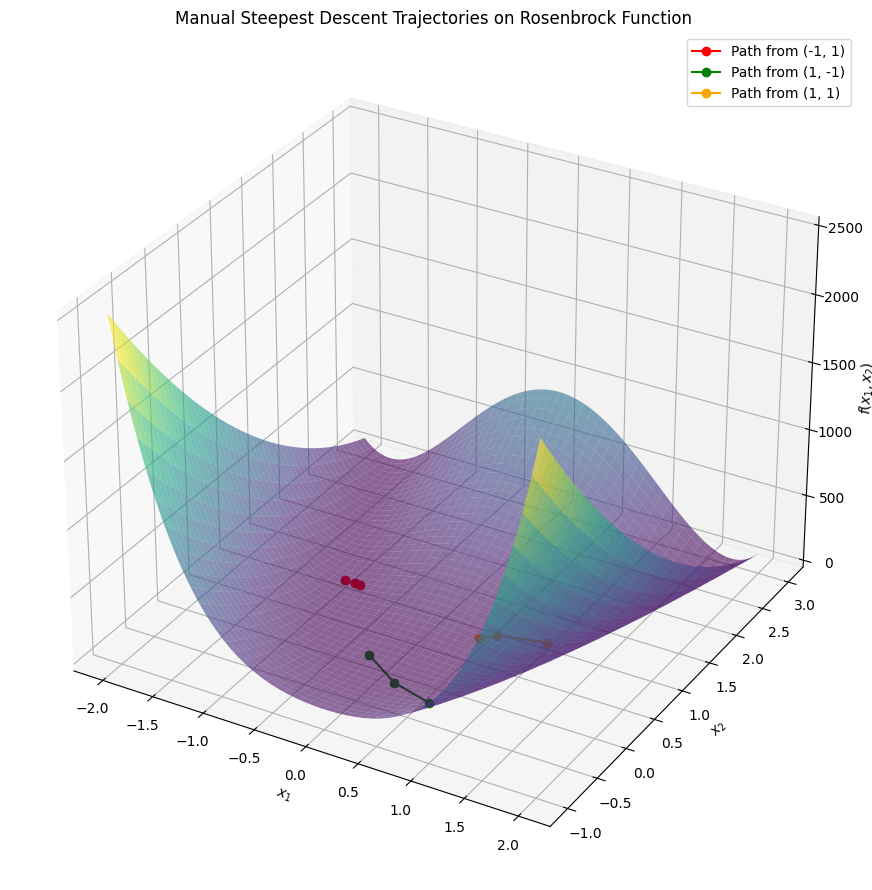

In [26]:
# 3D surface plot showing manual steepest descent trajectories
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface of the Rosenbrock function
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# Plot each manual trajectory on top of the surface
for label, traj in manual_trajectories.items():
    zs = np.array([rosenbrock(p) for p in traj])  # Compute function values
    ax.plot(traj[:, 0], traj[:, 1], zs, 'o-', label=f'Path from {label}', color=colors[label])

# Label axes and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.set_title('Manual Steepest Descent Trajectories on Rosenbrock Function')

# Show legend and finalize layout
ax.legend()
plt.tight_layout()
plt.savefig("graph10.png", dpi=300)
plt.show()